Importing Necessary Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Requesting Data from Cars24 website and storing it

In [2]:
base_url = 'https://www.cars24.com/buy-used-car/?f=make%3A%3D%3Atoyota&sort=bestmatch&serveWarrantyCount=true&listingSource=Homepage_Filters&storeCityId=2378'
r = requests.get(base_url)
htmlContent = r.content
soup = BeautifulSoup(htmlContent,"html.parser")

Checking length of the Data Extracted i.e. how many cars were extracted from Cars24 Website

In [3]:
data = soup.find_all('a', attrs = {'class':'IIJDn'})
len(data)

18

Extracting the name of the cars listed on the Cars24 website and then checking the name of the cars that were extracted

In [4]:
all_cars = soup.find_all('h3', attrs={'class':'_11dVb'})
car_data = []
for car in all_cars:
    car_data.append(car.get_text())
car_data

['2012 Toyota Etios Liva G',
 '2018 Toyota YARIS VX MT',
 '2021 Toyota URBAN CRUISER PREMIUM GRADE MT',
 '2014 Toyota Etios Liva G',
 '2011 Toyota Etios Liva G',
 '2022 Toyota URBAN CRUISER PREMIUM GRADE AT',
 '2011 Toyota Etios Liva G',
 '2018 Toyota Corolla Altis VL CVT PETROL',
 '2017 Toyota Corolla Altis VL CVT PETROL',
 '2019 Toyota Glanza G CVT',
 '2018 Toyota Corolla Altis VL CVT PETROL',
 '2020 Toyota Glanza V CVT',
 '2017 Toyota Corolla Altis VL CVT PETROL',
 '2019 Toyota Glanza V CVT',
 '2019 Toyota Glanza G CVT',
 '2011 Toyota Etios Liva G',
 '2021 Toyota URBAN CRUISER HIGH GRADE AT',
 '2012 Toyota Innova 2.5 GX 8 STR']

Extracting the Car Details i.e. KM driven, Fuel Type and Transmission Type about the cars listed on the Cars24 website and then checking the data that was extracted

In [5]:
car_details = []
for i in range(len(data)):
    other_details = data[i].find_all('li')
    one_car_details = []
    for dtl in other_details:
        if dtl.get_text() == "":
            continue
        details = dtl.get_text()
        one_car_details.append(details)
    car_details.append(one_car_details)
car_details

[['52,656 km', 'Petrol', 'Manual'],
 ['30,509 km', 'Petrol', 'Manual'],
 ['18,001 km', 'Petrol', 'Manual'],
 ['23,685 km', 'Petrol', 'Manual'],
 ['79,643 km', 'Petrol', 'Manual'],
 ['33,986 km', 'Petrol', 'Automatic'],
 ['77,595 km', 'Petrol', 'Manual'],
 ['74,221 km', 'Petrol', 'Automatic'],
 ['56,595 km', 'Petrol', 'Automatic'],
 ['16,870 km', 'Petrol', 'Automatic'],
 ['77,581 km', 'Petrol', 'Automatic'],
 ['56,916 km', 'Petrol', 'Automatic'],
 ['61,520 km', 'Petrol', 'Automatic'],
 ['15,816 km', 'Petrol', 'Automatic'],
 ['21,695 km', 'Petrol', 'Automatic'],
 ['75,420 km', 'Petrol', 'Manual'],
 ['45,799 km', 'Petrol', 'Automatic'],
 ['89,683 km', 'Diesel', 'Manual']]

Extracting the price of the cars listed on the Cars24 website and then checking the name of the prices that were extracted

In [6]:
all_prices = soup.find_all('strong', attrs={'class':'_3RL-I'})
car_prices = []
for price in all_prices:
    price = price.get_text()
    car_prices.append(price[1:])
car_prices

['2.37 Lakh',
 '7.83 Lakh',
 '9.57 Lakh',
 '3.33 Lakh',
 '2.33 Lakh',
 '10.11 Lakh',
 '2.37 Lakh',
 '9.58 Lakh',
 '10.33 Lakh',
 '6.79 Lakh',
 '9.80 Lakh',
 '6.98 Lakh',
 '10.21 Lakh',
 '7.93 Lakh',
 '7.28 Lakh',
 '2.58 Lakh',
 '9.89 Lakh',
 '6.60 Lakh']

Extracting the available location of the cars listed on the Cars24 website and then checking the locations of the cars that were extracted

In [7]:
all_locations = soup.find_all('p', attrs={'class':'_3dGMY'})
car_locations = []
for ltn in all_locations:
    location = ltn.find_all('span')
    location = location[-1].get_text(strip=True)
    car_locations.append(location)
car_locations

['Goregaon, Mumbai',
 'Goregaon, Mumbai',
 'Goregaon, Mumbai',
 'Seawood',
 'Mulund West, Mumbai',
 'Seawood',
 'Seawood',
 'Mulund West, Mumbai',
 'Mulund West, Mumbai',
 'Seawood',
 'Mulund West, Mumbai',
 'Goregaon, Mumbai',
 'Mulund West, Mumbai',
 'Goregaon, Mumbai',
 'Seawood',
 'Goregaon, Mumbai',
 'Goregaon, Mumbai']

Extracting the special features of the cars listed on the Cars24 website and then checking the special features of the cars that were extracted

In [8]:
spl_features = soup.find_all('span', attrs = {'class':'_3JoYA'})
car_spl_features = []
for feature in spl_features:
    car_spl_features.append(feature.get_text())
car_spl_features

['City Driven',
 'Top Model',
 'Top Model',
 'Reg. Serviced',
 'City Driven',
 'Top Model',
 'City Driven',
 'Alloy Wheels',
 'Alloy Wheels',
 'Alloy Wheels',
 'Alloy Wheels',
 'Top Model',
 'Alloy Wheels',
 'Top Model',
 'Alloy Wheels',
 '100% Tyre Life',
 'Alloy Wheels',
 '100% Tyre Life']

Splitting the data as necessary for analysis and filling the null values that were not found on the Cars24 website as Not Available during the merging of the data found for all cars. The data would be stored in list of lists it would be as the year of car model, car model, km driven, fuel type, transmission type, price of the car, location of the car and at last special features of the car.

In [9]:
all_car_details_df = []
for i in range(len(data)):
    car_details_df = []
#     splitting car year and car name into two parts then adding it to list
    try:
        car_dt = car_data[i].split(" ")
        year = str(car_dt[0])
        model = " ".join(car_dt[1:])
        car_details_df = [year, model]
    except IndexError:
        year = "Not Available"
        model = "Not Available"
    
#     adding car km driven, fuel type and transmission type into the list
    try:
        details = car_details[i]
        km = details[0].split(" ")
        km = km[0]
        km = int(km.replace(",", ""))
        details[0] = km
        car_details_df.extend(details)
    except IndexError:
        car_details_df.extend(["Not Available", "Not Available", "Not Available"])
        
#     adding price to the list
    try:
        price = car_prices[i].split(" ")
        price = price[0]
        car_details_df.append(price)
    except IndexError:
        car_details_df.append("Not Available")
    
#     adding location to the list
    try:
        car_details_df.append(car_locations[i])
    except IndexError:
        car_details_df.append("Not Available")
    
#     adding car features to the list
    try:
        car_details_df.append(car_spl_features[i])
    except IndexError:
        car_details_df.append("Not Available")
    
#     appending all the details found foound one car into the list
    all_car_details_df.append(car_details_df)
    
all_car_details_df

[['2012',
  'Toyota Etios Liva G',
  52656,
  'Petrol',
  'Manual',
  '2.37',
  'Goregaon, Mumbai',
  'City Driven'],
 ['2018',
  'Toyota YARIS VX MT',
  30509,
  'Petrol',
  'Manual',
  '7.83',
  'Goregaon, Mumbai',
  'Top Model'],
 ['2021',
  'Toyota URBAN CRUISER PREMIUM GRADE MT',
  18001,
  'Petrol',
  'Manual',
  '9.57',
  'Goregaon, Mumbai',
  'Top Model'],
 ['2014',
  'Toyota Etios Liva G',
  23685,
  'Petrol',
  'Manual',
  '3.33',
  'Seawood',
  'Reg. Serviced'],
 ['2011',
  'Toyota Etios Liva G',
  79643,
  'Petrol',
  'Manual',
  '2.33',
  'Mulund West, Mumbai',
  'City Driven'],
 ['2022',
  'Toyota URBAN CRUISER PREMIUM GRADE AT',
  33986,
  'Petrol',
  'Automatic',
  '10.11',
  'Seawood',
  'Top Model'],
 ['2011',
  'Toyota Etios Liva G',
  77595,
  'Petrol',
  'Manual',
  '2.37',
  'Seawood',
  'City Driven'],
 ['2018',
  'Toyota Corolla Altis VL CVT PETROL',
  74221,
  'Petrol',
  'Automatic',
  '9.58',
  'Mulund West, Mumbai',
  'Alloy Wheels'],
 ['2017',
  'Toyota Cor

Storing the data into Dataframe

In [10]:
all_car_details_df = pd.DataFrame(all_car_details_df, columns = ['Year', 'Car Model', 'KM Driven',
                                                                 'Fuel Type', 'Transmission Type',
                                                                 'Price(in Lakhs)','Location', 'Car Features'])
all_car_details_df.head()

,Year,Car Model,KM Driven,Fuel Type,Transmission Type,Price(in Lakhs),Location,Car Features
0,2012,Toyota Etios Liva G,52656,Petrol,Manual,2.37,"Goregaon, Mumbai",City Driven
1,2018,Toyota YARIS VX MT,30509,Petrol,Manual,7.83,"Goregaon, Mumbai",Top Model
2,2021,Toyota URBAN CRUISER PREMIUM GRADE MT,18001,Petrol,Manual,9.57,"Goregaon, Mumbai",Top Model
3,2014,Toyota Etios Liva G,23685,Petrol,Manual,3.33,Seawood,Reg. Serviced
4,2011,Toyota Etios Liva G,79643,Petrol,Manual,2.33,"Mulund West, Mumbai",City Driven


Changing the datatype of the car such as for columns Price and Kms the car was driven to 'int' type.

In [11]:
# changing the datatypes for some columns
all_car_details_df['Price(in Lakhs)'] = all_car_details_df['Price(in Lakhs)'].astype('float')
all_car_details_df['KM Driven'] = all_car_details_df['KM Driven'].astype('int')

Storing the data into csv file

In [12]:
all_car_details_df.to_csv('Cars24.csv', index = False)

Quick overview on how the collected data is distributed.

In [13]:
all_car_details_df.describe(include = 'all')

,Year,Car Model,KM Driven,Fuel Type,Transmission Type,Price(in Lakhs),Location,Car Features
count,18,18,18.000000,18,18,18.000000,18,18
unique,9,9,NaN,2,2,NaN,4,5
top,2018,Toyota Etios Liva G,NaN,Petrol,Automatic,NaN,"Goregaon, Mumbai",Alloy Wheels
freq,3,5,NaN,17,10,NaN,7,7
mean,NaN,NaN,50455.055556,NaN,NaN,6.993333,NaN,NaN
std,NaN,NaN,25290.739885,NaN,NaN,3.068266,NaN,NaN
min,NaN,NaN,15816.000000,NaN,NaN,2.330000,NaN,NaN
25%,NaN,NaN,25391.000000,NaN,NaN,4.147500,NaN,NaN
50%,NaN,NaN,54625.500000,NaN,NaN,7.555000,NaN,NaN
75%,NaN,NaN,75120.250000,NaN,NaN,9.745000,NaN,NaN


Checking all the columns and datatypes of the columns.

In [14]:
all_car_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               18 non-null     object 
 1   Car Model          18 non-null     object 
 2   KM Driven          18 non-null     int32  
 3   Fuel Type          18 non-null     object 
 4   Transmission Type  18 non-null     object 
 5   Price(in Lakhs)    18 non-null     float64
 6   Location           18 non-null     object 
 7   Car Features       18 non-null     object 
dtypes: float64(1), int32(1), object(6)
memory usage: 1.2+ KB


In [15]:
# sns.displot(all_car_details_df['Price(in Lakhs)'], kind='hist')
# plt.xlabel('Car Price')
# plt.ylabel('Frequency')
# plt.title('Distribution of Car Prices')
# plt.show()

Plotting Pie chart for the fuel type of the cars

In [16]:
fuel_type_count = (all_car_details_df.groupby(['Fuel Type'], as_index = False,)
                   .agg(Count = ('Fuel Type', 'count')))
fuel_type_count

,Fuel Type,Count
0,Diesel,1
1,Petrol,17


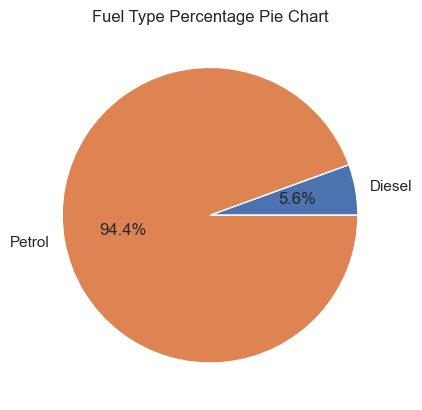

In [17]:
labels = fuel_type_count['Fuel Type'].values
sizes = fuel_type_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Fuel Type Percentage Pie Chart")
plt.show()

Plotting Pie chart for the transmission type of the cars

In [18]:
trans_type_count = (all_car_details_df.groupby(['Transmission Type'], as_index = False,)
                    .agg(Count = ('Transmission Type', 'count')))
trans_type_count

,Transmission Type,Count
0,Automatic,10
1,Manual,8


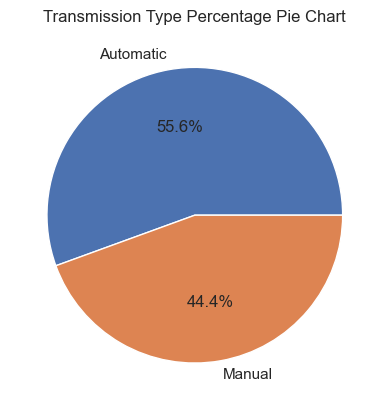

In [19]:
labels = trans_type_count['Transmission Type'].values
sizes = trans_type_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Transmission Type Percentage Pie Chart")
plt.show()

Adding column into the dataframe for transmission and fuel type combinations that are avilable in the dataset.

In [20]:
all_car_details_df['Trans Fuel Type'] = all_car_details_df['Transmission Type'] + str("-") + all_car_details_df['Fuel Type']
all_car_details_df.head()

,Year,Car Model,KM Driven,Fuel Type,Transmission Type,Price(in Lakhs),Location,Car Features,Trans Fuel Type
0,2012,Toyota Etios Liva G,52656,Petrol,Manual,2.37,"Goregaon, Mumbai",City Driven,Manual-Petrol
1,2018,Toyota YARIS VX MT,30509,Petrol,Manual,7.83,"Goregaon, Mumbai",Top Model,Manual-Petrol
2,2021,Toyota URBAN CRUISER PREMIUM GRADE MT,18001,Petrol,Manual,9.57,"Goregaon, Mumbai",Top Model,Manual-Petrol
3,2014,Toyota Etios Liva G,23685,Petrol,Manual,3.33,Seawood,Reg. Serviced,Manual-Petrol
4,2011,Toyota Etios Liva G,79643,Petrol,Manual,2.33,"Mulund West, Mumbai",City Driven,Manual-Petrol


Plotting Pie chart for the transmission and fuel type combinations of the cars that were found.

In [21]:
trans_fuel_type_count = (all_car_details_df.groupby(['Trans Fuel Type'], as_index = False,)
                         .agg(Count = ('Trans Fuel Type', 'count')))
trans_fuel_type_count

,Trans Fuel Type,Count
0,Automatic-Petrol,10
1,Manual-Diesel,1
2,Manual-Petrol,7


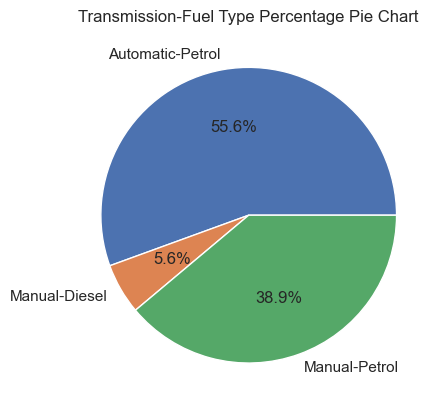

In [22]:
labels = trans_fuel_type_count['Trans Fuel Type'].values
sizes = trans_fuel_type_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Transmission-Fuel Type Percentage Pie Chart")
plt.show()

Plotting Pie chart for the locations where the cars are available.

In [23]:
location_count = (all_car_details_df.groupby(['Location'], as_index = False,)
                         .agg(Count = ('Location', 'count')))
location_count

,Location,Count
0,"Goregaon, Mumbai",7
1,"Mulund West, Mumbai",5
2,Not Available,1
3,Seawood,5


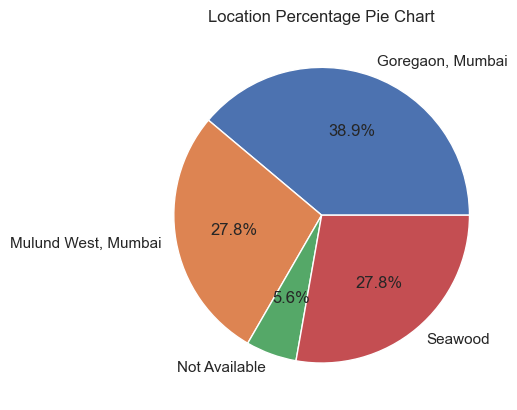

In [24]:
labels = location_count['Location'].values
sizes = location_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Location Percentage Pie Chart")
plt.show()

Plotting Pie chart and horizontal bar-plot  for the special features of the cars are available.

In [25]:
car_features = (all_car_details_df.groupby(['Car Features'], as_index = False,)
                         .agg(Count = ('Car Features', 'count')))
car_features

,Car Features,Count
0,100% Tyre Life,2
1,Alloy Wheels,7
2,City Driven,3
3,Reg. Serviced,1
4,Top Model,5


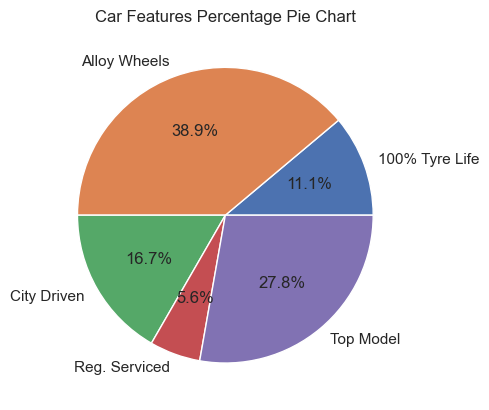

In [26]:
labels = car_features['Car Features'].values
sizes = car_features['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Car Features Percentage Pie Chart")
plt.show()

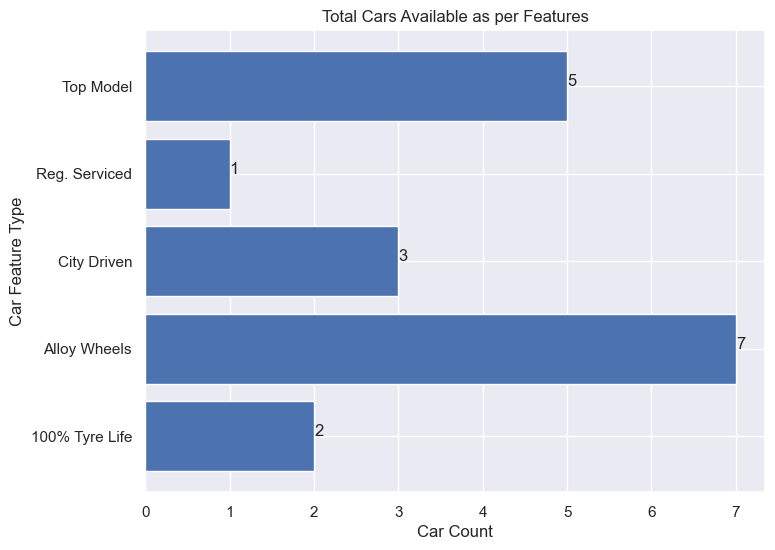

In [27]:
plt.figure(figsize=(8,6))
labels = car_features['Car Features'].values
sizes = car_features['Count'].values
plt.barh(labels, sizes)
plt.xlabel('Car Count')
plt.ylabel('Car Feature Type')
plt.title('Total Cars Available as per Features')

for index, value in enumerate(sizes):
    plt.text(value, index,
             str(value))

plt.show()

Plotting bar plot graph for average price of cars in lakhs available as per fuel type.

In [28]:
avg_price_fuel_type = (all_car_details_df.groupby(['Fuel Type'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_price_fuel_type

,Fuel Type,Avg_Price
0,Diesel,6.600000
1,Petrol,7.016471


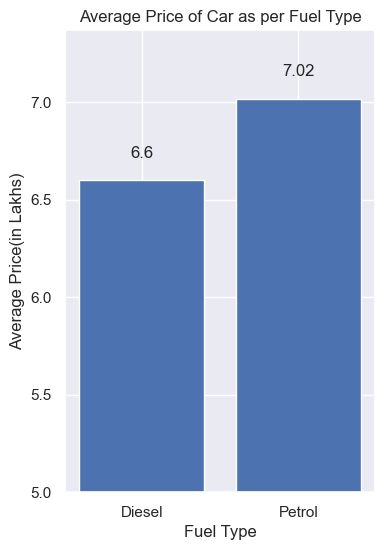

In [29]:
plt.figure(figsize=(4,6))
labels = avg_price_fuel_type['Fuel Type'].values
sizes = avg_price_fuel_type['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car as per Fuel Type')
plt.ylim(5)

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average price of cars in lakhs available as per transmission type.

In [30]:
avg_price_trans_type = (all_car_details_df.groupby(['Transmission Type'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_price_trans_type

,Transmission Type,Avg_Price
0,Automatic,8.8900
1,Manual,4.6225


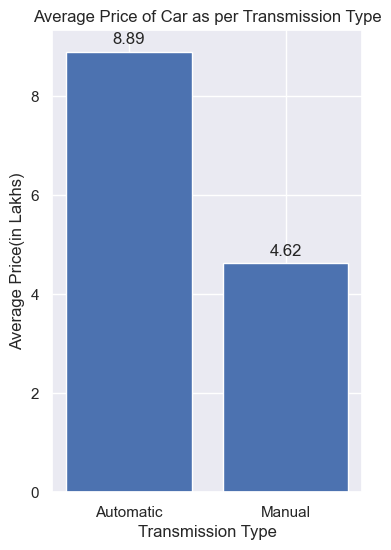

In [31]:
plt.figure(figsize=(4,6))
labels = avg_price_trans_type['Transmission Type'].values
sizes = avg_price_trans_type['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Transmission Type')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car as per Transmission Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average price of cars in lakhs available as per transmission - fuel combination type.

In [32]:
avg_price_trans_fuel_type = (all_car_details_df.groupby(['Trans Fuel Type'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_price_trans_fuel_type

,Trans Fuel Type,Avg_Price
0,Automatic-Petrol,8.89
1,Manual-Diesel,6.60
2,Manual-Petrol,4.34


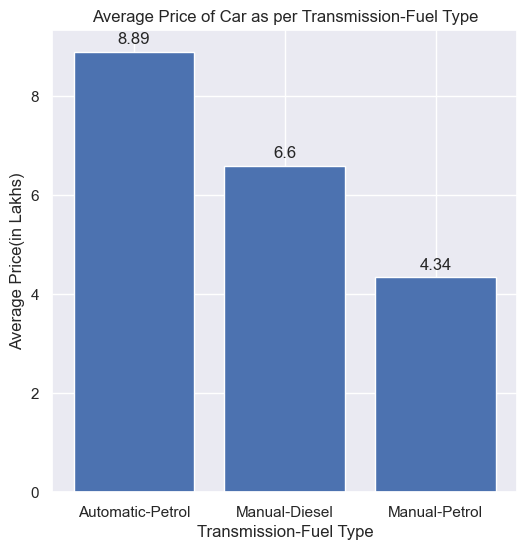

In [33]:
plt.figure(figsize=(6,6))
labels = avg_price_trans_fuel_type['Trans Fuel Type'].values
sizes = avg_price_trans_fuel_type['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Transmission-Fuel Type')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car as per Transmission-Fuel Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average Kms Car was driven that were available as per transmission type.

In [34]:
avg_driven_trans_type = (all_car_details_df.groupby(['Transmission Type'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_driven_trans_type

,Transmission Type,Avg_Driven
0,Automatic,46099.9
1,Manual,55899.0


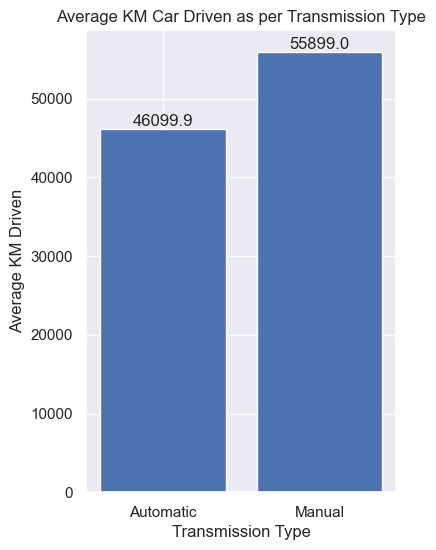

In [35]:
plt.figure(figsize=(4,6))
labels = avg_driven_trans_type['Transmission Type'].values
sizes = avg_driven_trans_type['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Transmission Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Car Driven as per Transmission Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average Kms Car was driven that were available as per fuel type.

In [36]:
avg_driven_fuel_type = (all_car_details_df.groupby(['Fuel Type'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_driven_fuel_type

,Fuel Type,Avg_Driven
0,Diesel,89683.000000
1,Petrol,48147.529412


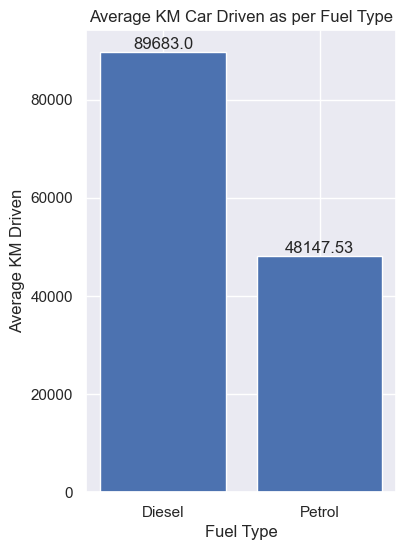

In [37]:
plt.figure(figsize=(4,6))
labels = avg_driven_fuel_type['Fuel Type'].values
sizes = avg_driven_fuel_type['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Fuel Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Car Driven as per Fuel Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average Kms Car was driven that were available as per transmission and fuel type combination.

In [38]:
avg_driven_trans_fuel_type = (all_car_details_df.groupby(['Trans Fuel Type'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_driven_trans_fuel_type

,Trans Fuel Type,Avg_Driven
0,Automatic-Petrol,46099.900000
1,Manual-Diesel,89683.000000
2,Manual-Petrol,51072.714286


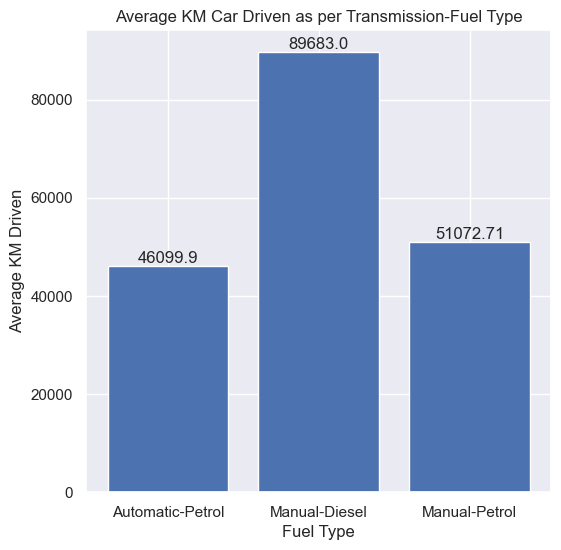

In [39]:
plt.figure(figsize=(6,6))
labels = avg_driven_trans_fuel_type['Trans Fuel Type'].values
sizes = avg_driven_trans_fuel_type['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Fuel Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Car Driven as per Transmission-Fuel Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average price of cars available for each year.

In [40]:
avg_year_price = (all_car_details_df.groupby(['Year'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_year_price

,Year,Avg_Price
0,2011,2.426667
1,2012,4.485000
2,2014,3.330000
3,2017,10.270000
4,2018,9.070000
5,2019,7.333333
6,2020,6.980000
7,2021,9.730000
8,2022,10.110000


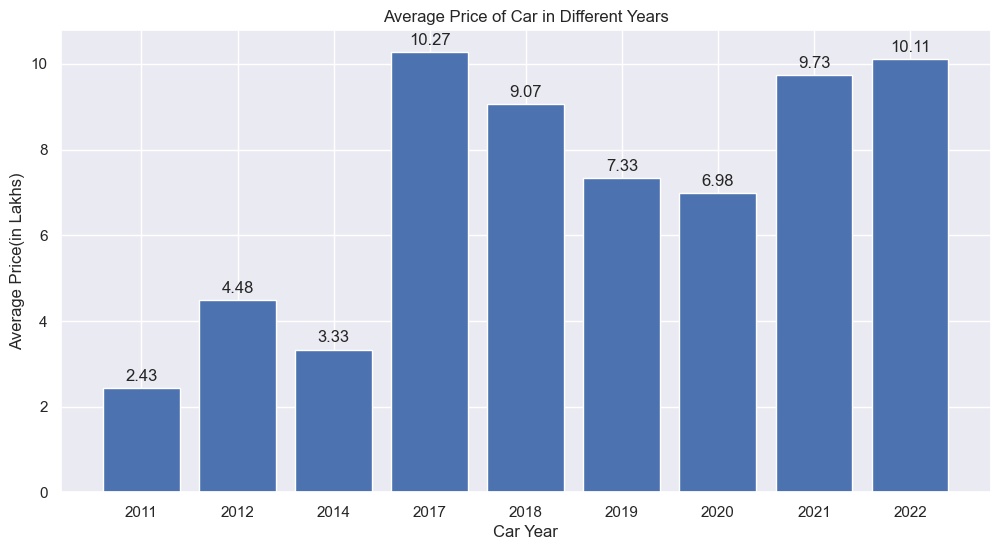

In [41]:
plt.figure(figsize=(12,6))
labels = avg_year_price['Year'].values
sizes = avg_year_price['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Car Year')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car in Different Years')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average km cars available were driven for each year.

In [42]:
avg_year_driven = (all_car_details_df.groupby(['Year'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_year_driven

,Year,Avg_Driven
0,2011,77552.666667
1,2012,71169.500000
2,2014,23685.000000
3,2017,59057.500000
4,2018,60770.333333
5,2019,18127.000000
6,2020,56916.000000
7,2021,31900.000000
8,2022,33986.000000


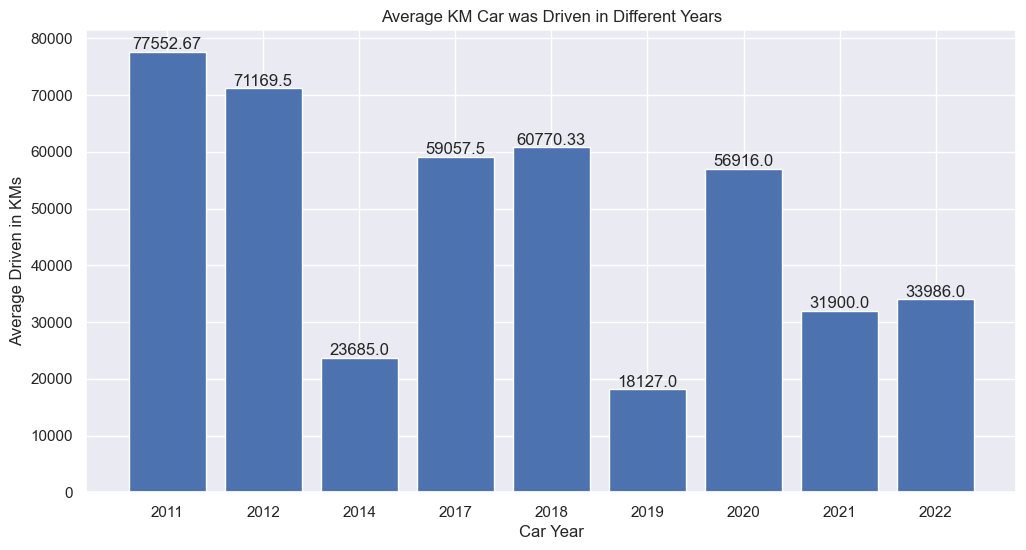

In [43]:
plt.figure(figsize=(12,6))
labels = avg_year_driven['Year'].values
sizes = avg_year_driven['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Car Year')
plt.ylabel('Average Driven in KMs')
plt.title('Average KM Car was Driven in Different Years')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12) 

plt.show()

Plotting bar plot graph for average kms each car model was driven neglecting the year of the car model.

In [44]:
avg_car_driven = (all_car_details_df.groupby(['Car Model'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_car_driven

,Car Model,Avg_Driven
0,Toyota Corolla Altis VL CVT PETROL,67479.25
1,Toyota Etios Liva G,61799.80
2,Toyota Glanza G CVT,19282.50
3,Toyota Glanza V CVT,36366.00
4,Toyota Innova 2.5 GX 8 STR,89683.00
5,Toyota URBAN CRUISER HIGH GRADE AT,45799.00
6,Toyota URBAN CRUISER PREMIUM GRADE AT,33986.00
7,Toyota URBAN CRUISER PREMIUM GRADE MT,18001.00
8,Toyota YARIS VX MT,30509.00


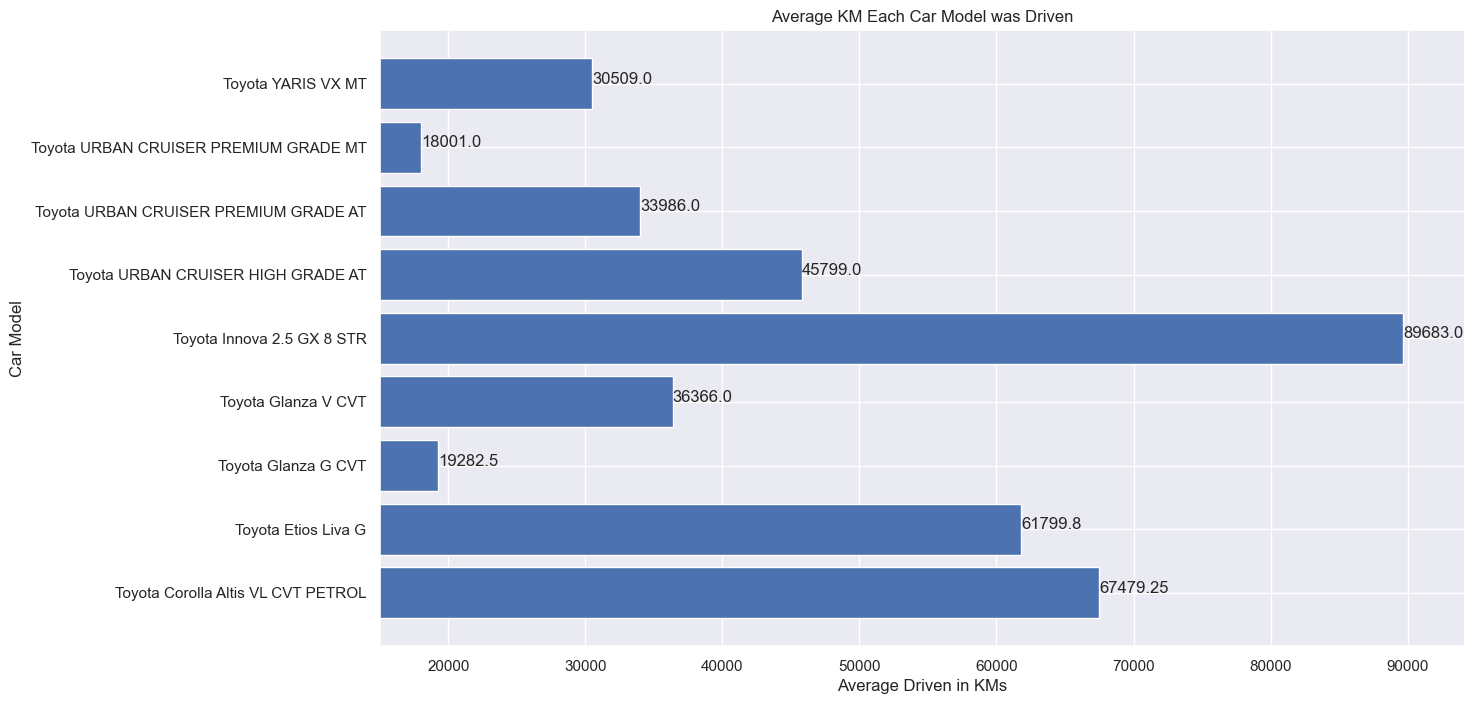

In [45]:
plt.figure(figsize=(14,8))
labels = avg_car_driven['Car Model'].values
sizes = avg_car_driven['Avg_Driven'].values
plt.barh(labels, sizes)
plt.xlabel('Average Driven in KMs')
plt.ylabel('Car Model')
plt.title('Average KM Each Car Model was Driven')
plt.xlim(15000)

for index, value in enumerate(sizes):
    plt.text(value, index,
             str(value))

plt.show()

Plotting bar plot graph for average price of each car model as per the year of the car.

In [46]:
avg_car_price_year = (all_car_details_df.groupby(['Car Model','Year'], as_index = False)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_car_price_year

,Car Model,Year,Avg_Price
0,Toyota Corolla Altis VL CVT PETROL,2017,10.270000
1,Toyota Corolla Altis VL CVT PETROL,2018,9.690000
2,Toyota Etios Liva G,2011,2.426667
3,Toyota Etios Liva G,2012,2.370000
4,Toyota Etios Liva G,2014,3.330000
5,Toyota Glanza G CVT,2019,7.035000
6,Toyota Glanza V CVT,2019,7.930000
7,Toyota Glanza V CVT,2020,6.980000
8,Toyota Innova 2.5 GX 8 STR,2012,6.600000
9,Toyota URBAN CRUISER HIGH GRADE AT,2021,9.890000


In [47]:
# for model in avg_car_price_year['Car Model'].unique():
#     model_data = avg_car_price_year[avg_car_price_year['Car Model'] == model]  # Filter data for each model

#     # Create a subplot for each car model
#     fig, ax = plt.subplots(figsize=(4,4))

#     # Scatter plot of Model Year vs. Price
#     sns.scatterplot(x='Year', y='Avg_Price', data=model_data, hue='Car Model', ax=ax)

#     # Customize the plot
#     plt.title(f'Model Year vs. Price for {model}')
#     plt.xlabel('Model Year')
#     plt.ylabel('Price')
#     plt.grid(True)

#     # Adjust layout for multiple subplots (optional)
#     plt.tight_layout()
# 
# plt.show()